## Applying Space-Filling Curves for Cut-In Scenarios

In [1]:
# Demo how to compute Morton codes.
import zCurve as z

# Combine the 3D point (2, 16, 8) into a Morton code.
morton_code = z.interlace(2, 16, 8)
assert morton_code == 10248, "morton_code should be 10248"
print( morton_code )

10248


In [4]:
# Demo for two-dimensional numbers:
import zCurve as z

morton_code1 = z.interlace(57772400, 12765000, dims=2)
assert morton_code1 == 1606428908008832, "morton_code1 should be 1606428908008832"

morton_code2 = z.interlace(57773800, 12772000, dims=2)
assert morton_code2 == 1606429041286208, "morton_code2 should be 1606429041286208"

print( str(morton_code1) + "\n" + str(morton_code2) )

1606428908008832
1606429041286208


Column headers: ['frame_id', 'cell1', 'cell2', 'cell3', 'cell4', 'cell5', 'cell6']


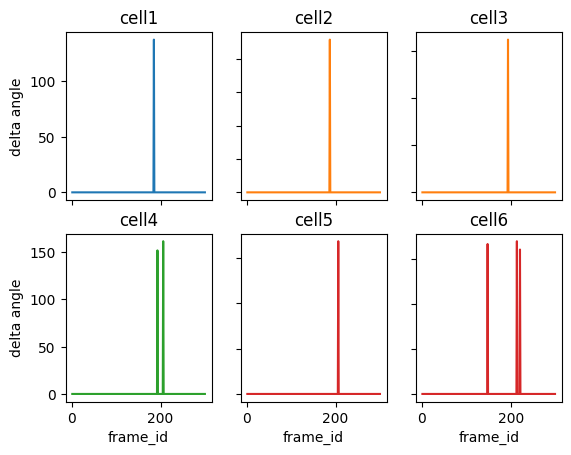

In [5]:
# Plot cut-in data.
import pandas as pd
import matplotlib.pyplot as plt

# First, we read the CSV file.
df = pd.read_csv('./OF/cut-in-2.csv', sep=';')

# Next, we print the column headers to know what we have access to.
cols = df.columns.values.tolist()
print( "Column headers: " + str(cols) )

# Next, we do subplots to plot the subcells.
fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(df['frame_id'], df['cell1'])
axs[0, 0].set_title('cell1')
axs[0, 1].plot(df['frame_id'], df['cell2'], 'tab:orange')
axs[0, 1].set_title('cell2')
axs[0, 2].plot(df['frame_id'], df['cell3'], 'tab:orange')
axs[0, 2].set_title('cell3')
axs[1, 0].plot(df['frame_id'], df['cell4'], 'tab:green')
axs[1, 0].set_title('cell4')
axs[1, 1].plot(df['frame_id'], df['cell5'], 'tab:red')
axs[1, 1].set_title('cell5')
axs[1, 2].plot(df['frame_id'], df['cell6'], 'tab:red')
axs[1, 2].set_title('cell6')

for ax in axs.flat:
    ax.set(xlabel='frame_id', ylabel='delta angle')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [6]:
# Example to compute a 6-dimensional Morton code from for row with frame_id 214.
import zCurve as z

def calculateMortonFrom6D_with_zCurve(a, b, c, d, e, f):
    # Cap floating point numbers to one decimal place
    a_int = int( round( a, 1 ) * 10 )
    b_int = int( round( b, 1 ) * 10 )
    c_int = int( round( c, 1 ) * 10 )
    d_int = int( round( d, 1 ) * 10 )
    e_int = int( round( e, 1 ) * 10 )
    f_int = int( round( f, 1 ) * 10 )
    value = z.interlace(a_int, b_int, c_int, d_int, e_int, f_int, dims=6)
    return value

morton_code = calculateMortonFrom6D_with_zCurve(df['cell1'][213],
                                                df['cell2'][213], 
                                                df['cell3'][213], 
                                                df['cell4'][213], 
                                                df['cell5'][213], 
                                                df['cell6'][213])

print( "Morton Code for: " + "(" + str(df['cell1'][213]) + ","
                                 + str(df['cell2'][213]) + ","
                                 + str(df['cell3'][213]) + ","
                                 + str(df['cell4'][213]) + ","
                                 + str(df['cell5'][213]) + ","
                                 + str(df['cell6'][213]) + ") = " +
                                 str(morton_code) )

Morton Code for: (0.0,0.0,0.0,0.0,0.0,169.3626972436905) = 37470089637756274688


In [7]:
# Example to compute all 6-dimensional Morton codes.
import zCurve as z

def calculateMortonFrom6D_with_zCurve(a, b, c, d, e, f):
    # Cap floating point numbers to one decimal place
    a_int = int( round( a, 1 ) * 10 )
    b_int = int( round( b, 1 ) * 10 )
    c_int = int( round( c, 1 ) * 10 )
    d_int = int( round( d, 1 ) * 10 )
    e_int = int( round( e, 1 ) * 10 )
    f_int = int( round( f, 1 ) * 10 )
    value = z.interlace(a_int, b_int, c_int, d_int, e_int, f_int, dims=6)
    return value
    
def calculateMortonFrom1D_with_zCurve(a):
    a_int = int( round( a, 1 ) * 10 )
    return z.interlace(a_int)

# Make sure indexes pair with number of rows.
df = df.reset_index(drop=True)


lst = []
for _, row in df.iterrows():
    morton_code = calculateMortonFrom6D_with_zCurve(row['cell1'],
                                                    row['cell2'], 
                                                    row['cell3'], 
                                                    row['cell4'], 
                                                    row['cell5'], 
                                                    row['cell6'])
    lst.append({'morton': morton_code, 'frame_id': row['frame_id']})
    
    print( "Morton Code for: " + "(" + str(row['cell1']) + ","
                                     + str(row['cell2']) + ","
                                     + str(row['cell3']) + ","
                                     + str(row['cell4']) + ","
                                     + str(row['cell5']) + ","
                                     + str(row['cell6']) + ") = " +
                                     str(morton_code) )

df2 = pd.DataFrame(lst, columns=['morton', 'frame_id'])
df['cell1_morton'] = df['cell1'].apply(calculateMortonFrom1D_with_zCurve)
df['cell2_morton'] = df['cell2'].apply(calculateMortonFrom1D_with_zCurve)
df['cell3_morton'] = df['cell3'].apply(calculateMortonFrom1D_with_zCurve)
df['cell4_morton'] = df['cell4'].apply(calculateMortonFrom1D_with_zCurve)
df['cell5_morton'] = df['cell5'].apply(calculateMortonFrom1D_with_zCurve)
df['cell6_morton'] = df['cell6'].apply(calculateMortonFrom1D_with_zCurve)

Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code for: (0.0,0.0,0.0,0.0,0.0,0.0) = 0
Morton Code f

In [15]:
from matplotlib import pyplot as plt

# The Morton numbers get really huge, let's make them smaller for visualization.
data = df2['morton']/1000000000000
print(data)
plt.figure()
plt.xlabel('Morton')
plt.ylabel('frequency')
plt.ylim( (0,1) )
plt.eventplot(data, orientation='horizontal', colors='b', lineoffsets=0.5)
plt.show()

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
295    0.0
296    0.0
297    0.0
298    0.0
299    0.0
Name: morton, Length: 300, dtype: object


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
295    0.0
296    0.0
297    0.0
298    0.0
299    0.0
Name: morton, Length: 300, dtype: object


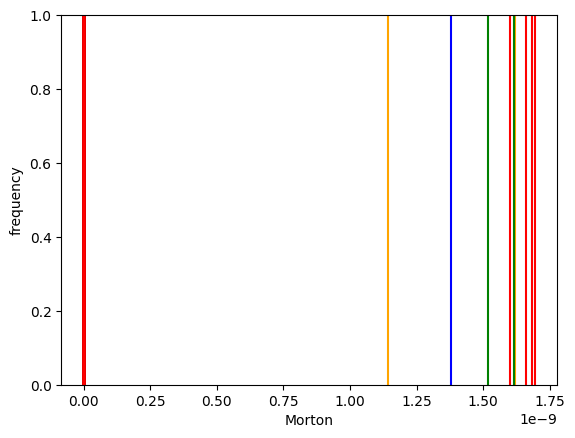

In [18]:
data_cell1 = df['cell1_morton']/1000000000000
data_cell2 = df['cell2_morton']/1000000000000
data_cell3 = df['cell3_morton']/1000000000000
data_cell4 = df['cell4_morton']/1000000000000
data_cell5 = df['cell5_morton']/1000000000000
data_cell6 = df['cell6_morton']/1000000000000

print(data)
plt.figure()
plt.xlabel('Morton')
plt.ylabel('frequency')
plt.ylim( (0,1) )

plt.eventplot(data_cell1, orientation='horizontal', colors='b', lineoffsets=0.5)
plt.eventplot(data_cell2, orientation='horizontal', colors='orange', lineoffsets=0.5)
plt.eventplot(data_cell3, orientation='horizontal', colors='orange', lineoffsets=0.5)
plt.eventplot(data_cell4, orientation='horizontal', colors='g', lineoffsets=0.5)
plt.eventplot(data_cell5, orientation='horizontal', colors='r', lineoffsets=0.5)
plt.eventplot(data_cell6, orientation='horizontal', colors='r', lineoffsets=0.5)
plt.show()